# Logistic Regression on hearing_test dataset (with standardization)

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

In [2]:
df = pd.read_csv('hearing_test.csv')
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [3]:
df[df.columns[:-1]]

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [4]:
x = df[df.columns[:-1]]
x

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [5]:
y = df[df.columns[-1:]]
y

,test_result
0,1
1,1
2,0
3,0
4,1
...,...
4995,0
4996,1
4997,1
4998,1


## Standardization

In [6]:
len(x)

5000

In [7]:
x['physical_score'].std()

8.169801702879488

In [8]:
x['age'][3]

56.0

In [9]:
for i in x.columns:
    mean = x[i].mean()
    std = x[i].std()
    for j in range(len(x)):
        x[i][j] = (x[i][j] - mean) / std

x

C:\Users\HP\AppData\Local\Temp\ipykernel_3912\3130740032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i][j] = (x[i][j] - mean) / std


,age,physical_score
0,-1.648711,0.971840
1,-0.142553,0.543433
2,0.034642,-0.986592
3,0.389032,-0.215459
4,-1.471516,1.241124
...,...,...
4995,1.895189,-3.532553
4996,0.477629,0.139506
4997,-0.231151,0.212948
4998,-1.205723,1.669531


## Adding 'x0' column = 1 in x for coding purpose 

In [10]:
x['x0'] = 1
x

,age,physical_score,x0
0,-1.648711,0.971840,1
1,-0.142553,0.543433,1
2,0.034642,-0.986592,1
3,0.389032,-0.215459,1
4,-1.471516,1.241124,1
...,...,...,...
4995,1.895189,-3.532553,1
4996,0.477629,0.139506,1
4997,-0.231151,0.212948,1
4998,-1.205723,1.669531,1


In [11]:
columns = list()
columns.append(x.columns[-1])

for i in x.columns[:-1]:
    columns.append(i)
columns

['x0', 'age', 'physical_score']

In [12]:
x[columns]

,x0,age,physical_score
0,1,-1.648711,0.971840
1,1,-0.142553,0.543433
2,1,0.034642,-0.986592
3,1,0.389032,-0.215459
4,1,-1.471516,1.241124
...,...,...,...
4995,1,1.895189,-3.532553
4996,1,0.477629,0.139506
4997,1,-0.231151,0.212948
4998,1,-1.205723,1.669531


In [13]:
x = x[columns]
x

,x0,age,physical_score
0,1,-1.648711,0.971840
1,1,-0.142553,0.543433
2,1,0.034642,-0.986592
3,1,0.389032,-0.215459
4,1,-1.471516,1.241124
...,...,...,...
4995,1,1.895189,-3.532553
4996,1,0.477629,0.139506
4997,1,-0.231151,0.212948
4998,1,-1.205723,1.669531


## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.1,random_state=101)

In [15]:
x_train

,x0,age,physical_score
141,1,-1.737308,1.253365
4755,1,0.920617,-0.619386
4886,1,-1.028528,2.000017
2304,1,1.363604,-0.668347
2727,1,0.123239,0.310869
...,...,...,...
4171,1,1.717994,-2.002528
599,1,0.211837,0.359830
1361,1,1.186409,-1.414999
1547,1,2.781164,-1.060033


In [16]:
y_train

,test_result
141,1
4755,0
4886,1
2304,0
2727,1
...,...
4171,0
599,1
1361,0
1547,0


# Logistic Regression

## Initializing weights

In [17]:
n = len(x_train.columns)
n

3

In [18]:
w = np.zeros(n)
w

array([0., 0., 0.])

## Adjusting Weights

In [19]:
import math
math.exp(1)

2.718281828459045

In [20]:
len(w)

3

In [21]:
x_train

,x0,age,physical_score
141,1,-1.737308,1.253365
4755,1,0.920617,-0.619386
4886,1,-1.028528,2.000017
2304,1,1.363604,-0.668347
2727,1,0.123239,0.310869
...,...,...,...
4171,1,1.717994,-2.002528
599,1,0.211837,0.359830
1361,1,1.186409,-1.414999
1547,1,2.781164,-1.060033


In [22]:
x_train.iloc[0,2]

1.2533645702062668

In [23]:
y_train

,test_result
141,1
4755,0
4886,1
2304,0
2727,1
...,...
4171,0
599,1
1361,0
1547,0


In [24]:
y_train.iloc[1,0]

0

In [25]:
# math.log is what we interpret ln in math
math.log(10)

2.302585092994046

In [26]:
count_list = list()
loss_list = list()

for count in range(1,1001):

    count_list.append(count)

    
    # calculating predicted value (pre threshold) using sigmoid function

    linear_sum = 0
    y_cap = list()

    for j in range(len(x_train)):
        for i in range(len(x_train.columns)):
            linear_sum = linear_sum + w[i] * x_train.iloc[j,i]

        predicted_value = 1 / (1 + math.exp(-1*linear_sum))
        y_cap.append(predicted_value)
        linear_sum = 0


    # calculating average loss

    loss_sum = 0

    for i in range(len(y_train)):
        loss = -1 * y_train.iloc[i,0] * math.log(y_cap[i]) - (1 - y_train.iloc[i,0]) * math.log(1 - y_cap[i])
        loss_sum = loss_sum + loss

    avg_loss = loss_sum / len(y_train)
    loss_list.append(avg_loss)


    # optimizing with gradient descent

    gradient_sum = 0
    dw_list = list()

    for i in range(len(x.columns)):
        for j in range(len(x_train)):
            gradient_sum = gradient_sum + (y_cap[j] - y_train.iloc[j,0]) * x_train.iloc[j,i]
        dw = gradient_sum / len(x_train)
        dw_list.append(dw)
        gradient_sum = 0


    # updating weights

    learning_rate = 0.2

    for i in range(len(dw_list)):
        w[i] = w[i] - learning_rate * dw_list[i]

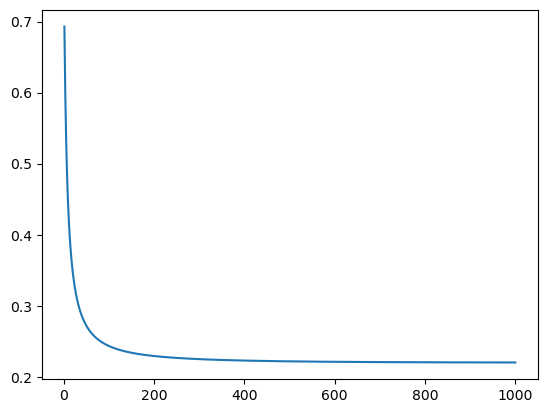

In [27]:
plt.plot(count_list,loss_list)

In [28]:
loss_list

[0.6931471805599777,
 0.6413848840352443,
 0.5981206868243697,
 0.5617920959990388,
 0.5310808572045914,
 0.5049144734732034,
 0.482437338045535,
 0.4629726569948487,
 0.44598584817699044,
 0.4310534333624476,
 0.4178381161504708,
 0.40606939804133635,
 0.39552871094248937,
 0.38603807126223494,
 0.3774514197709729,
 0.36964798944311145,
 0.36252719999097194,
 0.35600470302364806,
 0.3500092975698658,
 0.3444805073744475,
 0.33936666441966423,
 0.33462338222025384,
 0.33021233126134025,
 0.32610025024760536,
 0.32225814263826397,
 0.318660619732356,
 0.3152853604136205,
 0.3121126643397001,
 0.3091250804301878,
 0.30630709638233694,
 0.3036448779225323,
 0.30112604880666194,
 0.29873950437671404,
 0.29647525288542925,
 0.29432427990686794,
 0.29227843202616083,
 0.2903303166986172,
 0.28847321572573853,
 0.2867010102438218,
 0.28500811548288385,
 0.28338942384732824,
 0.28184025510927585,
 0.28035631270142947,
 0.2789336452575371,
 0.27756861268135263,
 0.27625785613523535,
 0.27499827

In [29]:
y_cap

[0.9985270765560179,
 0.07695220372859236,
 0.9997470455928211,
 0.0428742482424607,
 0.8096521868216411,
 0.9328841579839365,
 0.9320100078609068,
 0.9190442268897069,
 0.43575796215790646,
 0.920880418012321,
 0.980304649710208,
 0.9774111186997185,
 0.0029900942640967857,
 0.9496737796621025,
 0.3395404987965497,
 0.6126476092058448,
 0.03170654650424548,
 0.9940185037047291,
 0.3378344111795091,
 0.9777450388087706,
 0.0234077033907215,
 0.9841610691999454,
 0.3421896436039696,
 0.9460073751682767,
 0.9866478536127562,
 0.8715808953907941,
 0.08800791246995313,
 0.47096315860675053,
 0.9495739461882033,
 0.9992096830749225,
 0.0017325389968043724,
 0.9990358505741289,
 0.040143529234676206,
 0.8693928694946959,
 0.9956114001517429,
 0.9948175947009869,
 0.9041597140541987,
 0.9759916217621839,
 0.9868294497058187,
 0.10731612458685572,
 0.9800757017698454,
 0.9012362505486871,
 1.657464516321994e-05,
 0.005805011235393092,
 0.017242313096504112,
 0.9923674025906074,
 0.001908757434

In [30]:
w

array([ 0.53613882, -1.03270807,  3.34209535])

## Training Accuracy

just checking if the updated weights after 300 iterations are performing well on train dataset

In [31]:
# calculating predicted value (post threshold) using sigmoid function

linear_sum = 0
y_cap = list()

for j in range(len(x_train)):
    for i in range(len(x_train.columns)):
        linear_sum = linear_sum + w[i] * x_train.iloc[j,i]

    predicted_value = 1 / (1 + math.exp(-1*linear_sum))

    if predicted_value >= 0.5:
        final_result = 1
    else:
        final_result = 0

    y_cap.append(final_result)
    linear_sum = 0

y_cap

[1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [32]:
len(y_cap)

4500

In [33]:
# measuring accuracy

right = 0
wrong = 0

for i in range(len(y_train)):
    if y_cap[i] == y_train.iloc[i,0]:
        right = right + 1
    else:
        wrong = wrong + 1

accuracy = ( right * 100 ) / len(y_train)

print('Total :',len(y_train))
print('Right :',right)
print('Wrong :',wrong)
print('Accuracy :',accuracy)

Total : 4500
Right : 4114
Wrong : 386
Accuracy : 91.42222222222222


## Test Accuracy

In [34]:
# calculating predicted value (post threshold) using sigmoid function

linear_sum = 0
y_cap = list()

for j in range(len(x_test)):
    for i in range(len(x_test.columns)):
        linear_sum = linear_sum + w[i] * x_test.iloc[j,i]

    predicted_value = 1 / (1 + math.exp(-1*linear_sum))

    if predicted_value >= 0.5:
        final_result = 1
    else:
        final_result = 0

    y_cap.append(final_result)
    linear_sum = 0

y_cap

[1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,


In [35]:
len(y_cap)

500

In [36]:
# measuring accuracy

right = 0
wrong = 0

for i in range(len(y_test)):
    if y_cap[i] == y_test.iloc[i,0]:
        right = right + 1
    else:
        wrong = wrong + 1

accuracy = ( right * 100 ) / len(y_test)

print('Total :',len(y_test))
print('Right :',right)
print('Wrong :',wrong)
print('Accuracy :',accuracy)

Total : 500
Right : 466
Wrong : 34
Accuracy : 93.2
